In [1]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import os.path as op

In [80]:
file = pd.read_csv('results/natural/natural_imagebind_afforded.csv')
file = file.drop(columns=['Unnamed: 0'])
indexed = file.set_index('group_id')
indexed = indexed[indexed['prompt_type']== 'explicit'].reset_index()
pivoted = indexed.pivot_table(index='group_id', columns='relationships', values='probability', aggfunc='mean').reset_index()
diff = pivoted.assign(diff = pivoted['afforded'] - pivoted['non_afforded'])

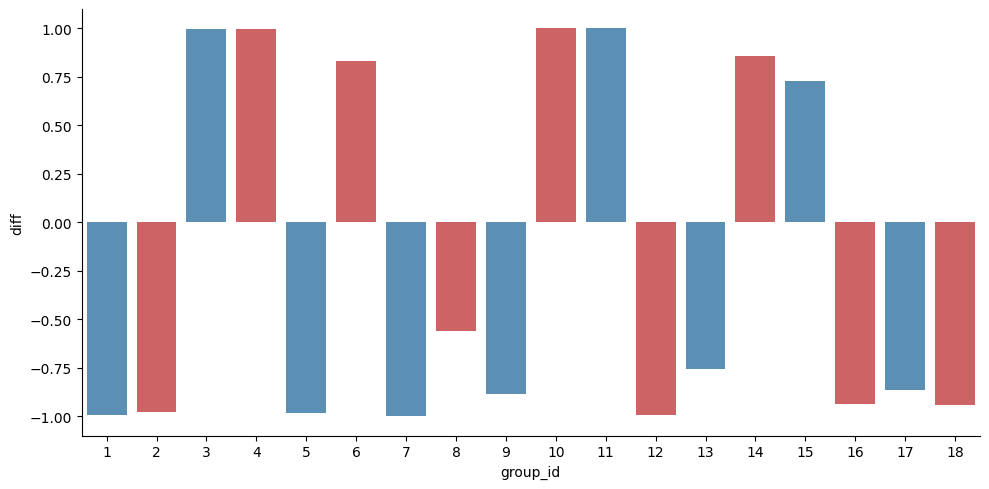

In [84]:
sns.catplot(data = diff,
            x = "group_id",
            y = "diff",
            kind='bar',
            height= 5,
            aspect=2,
            palette= ['C0','C3'],
            alpha= 0.8)